In [1]:
import xgboost as xgb
from utils import get_data, get_multiclass_data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
SEP = '*'*10

In [2]:

X = []
for i in range(1, 37):
    if i == 11: continue
    X.append(get_multiclass_data(i))
X = np.vstack(X)
y = X[:,-1]
X = X[:, :-1]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
# scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
clf = xgb.XGBClassifier(objective='multi:softprob')

In [5]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    266340
         1.0       0.97      0.78      0.87      4880
         2.0       0.97      0.72      0.83     14486

    accuracy                           0.98    285706
   macro avg       0.98      0.84      0.90    285706
weighted avg       0.98      0.98      0.98    285706



In [8]:
cm = confusion_matrix(y_test, y_pred)

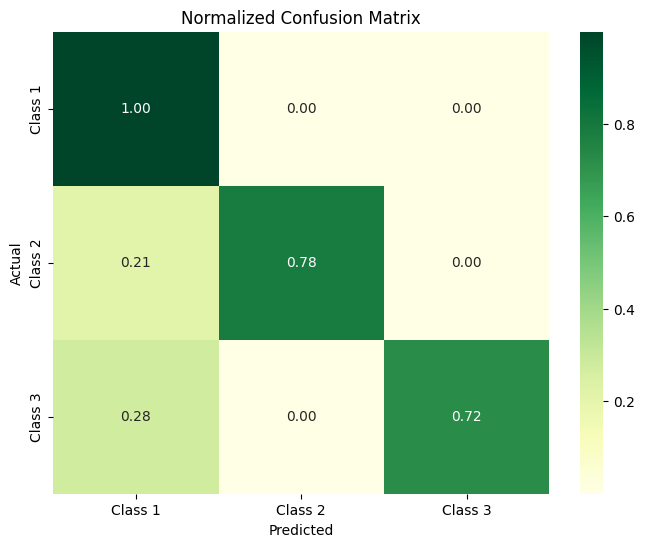

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Class 0', 'Class 1', 'Class 2']
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlGn', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
def draw_cm(cm):
    labels = ['Class 0', 'Class 1', 'Class 2']
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the normalized confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlGn', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Normalized Confusion Matrix')
    plt.show()